<a href="https://colab.research.google.com/github/Ankita280609/Machine_learning/blob/main/car_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class LinearRegression:
  def __init__(self)->None:
    self.weights: np.ndarray | None=None
    self.bias: np.ndarray | None=None
  def predict(self,x:np.ndarray)->np.ndarray:
    y_pred=np.dot(self.w,x.T)+self.b
    return y_pred
  def __loss(self,x:np.ndarray,y:np.ndarray,norm:int)->tuple:
    y_pred=self.predict(x)
    n=x.shape[0]
    errors=np.abs(y_pred-y)**norm
    loss=np.sum(errors)/n
    gradient_base=norm*np.sign(y_pred-y)*(np.abs(y_pred-y)**(norm-1))
    db=np.sum(gradient_base)/n
    dw=np.dot(gradient_base.T,x)/n
    return loss,dw,db
  def fit(self,x:np.ndarray,y:np.ndarray,epochs:int=500,alpha:float=0.01,norm:int=2,threshold:float=0.0001)->None:
    x=np.asarray(x,dtype=np.float64)
    y=np.asarray(y,dtype=np.float64)
    n_features=x.shape[1]
    self.w=np.zeros(n_features,dtype=np.float64)
    self.b=0.0
    prev_loss=float('inf')

    for epoch in range(epochs):

      current_loss,dw,db=self.__loss(x,y,norm)
      if abs(prev_loss-current_loss)<threshold:
        break
      prev_loss=current_loss
      self.w-=alpha*dw
      self.b-=alpha*db






In [ ]:
df=pd.read_csv('/content/sample_data/linear_data.csv')
df.head()

,Original Price,Miles Driven,Mileage,Tank Size,HorsePower,Top Speed,Acceleration,Age,Manual Transmission,Fuel,Estimated Price
0,3864000,1263,54.685799,13.336164,596,180,8.172050,4,False,Petrol,2.258675e+06
1,4288000,752,35.248357,19.057518,419,185,8.740271,3,True,Petrol,2.859767e+06
2,2966000,4838,58.345711,28.361993,346,259,6.533210,5,True,Diesel,1.333506e+06
3,3428000,3140,34.654196,24.024602,354,243,6.069808,4,True,Diesel,2.046536e+06
4,2079000,4048,32.048424,17.980987,473,216,7.744648,2,False,Diesel,1.204469e+06


In [ ]:
df_encoded=pd.get_dummies(df,columns=['Manual Transmission','Fuel'],dtype=int,drop_first=True)
df_encoded.head()

,Original Price,Miles Driven,Mileage,Tank Size,HorsePower,Top Speed,Acceleration,Age,Estimated Price,Manual Transmission_True,Fuel_Diesel,Fuel_EV,Fuel_Petrol
0,3864000,1263,54.685799,13.336164,596,180,8.172050,4,2.258675e+06,0,0,0,1
1,4288000,752,35.248357,19.057518,419,185,8.740271,3,2.859767e+06,1,0,0,1
2,2966000,4838,58.345711,28.361993,346,259,6.533210,5,1.333506e+06,1,1,0,0
3,3428000,3140,34.654196,24.024602,354,243,6.069808,4,2.046536e+06,1,1,0,0
4,2079000,4048,32.048424,17.980987,473,216,7.744648,2,1.204469e+06,0,1,0,0


In [ ]:
x=df_encoded.drop('Estimated Price',axis=1)
y=df_encoded['Estimated Price']
# x,y=x.to_numpy(),y.to_numpy()
x.head()

,Original Price,Miles Driven,Mileage,Tank Size,HorsePower,Top Speed,Acceleration,Age,Manual Transmission_True,Fuel_Diesel,Fuel_EV,Fuel_Petrol
0,3864000,1263,54.685799,13.336164,596,180,8.172050,4,0,0,0,1
1,4288000,752,35.248357,19.057518,419,185,8.740271,3,1,0,0,1
2,2966000,4838,58.345711,28.361993,346,259,6.533210,5,1,1,0,0
3,3428000,3140,34.654196,24.024602,354,243,6.069808,4,1,1,0,0
4,2079000,4048,32.048424,17.980987,473,216,7.744648,2,0,1,0,0


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train = x_train.astype(np.float64)
x_test = x_test.astype(np.float64)

In [ ]:
def z_score(x:np.ndarray)->tuple:
  x=np.asarray(x,dtype=np.float64)
  x_mean=np.mean(x,axis=0)
  x_std=np.std(x,axis=0)
  x=(x-x_mean)/x_std
  return x,x_mean,x_std


In [ ]:
x_train,x_mean,x_std=z_score(x_train)
x_test=(x_test-x_mean)/x_std


MSE_loss: 4618293.044911665


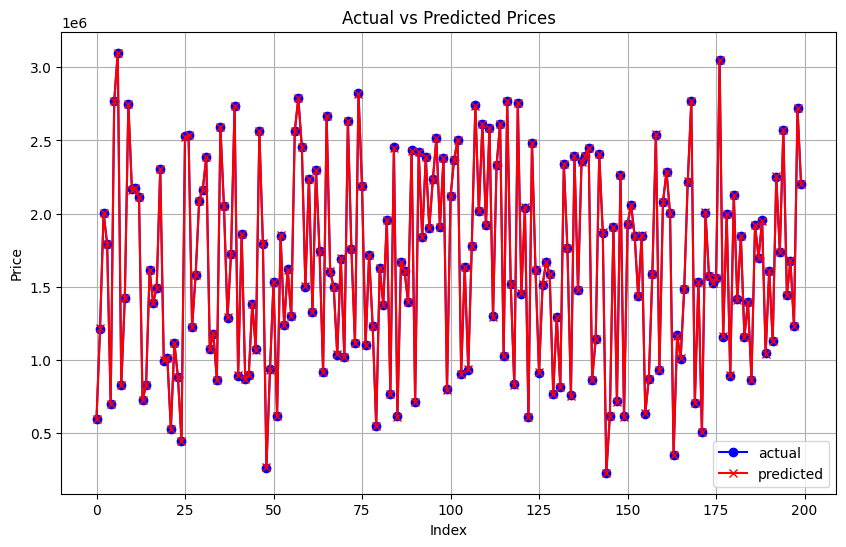

In [ ]:
model=LinearRegression()
model.fit(x_train,y_train,epochs=500,alpha=0.01,norm=2,threshold=0.0001)
y_pred=model.predict(x_test)
print("MSE_loss:",np.mean((y_pred-y_test)**2))
indices=np.arange(len(y_test))
plt.figure(figsize=(10,6))
plt.plot(indices,y_test,label='actual',color="blue",marker="o")
plt.plot(indices,y_pred,label='predicted',color="red",marker="x")
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()
